## CL-I Assignment No. 1
### Name : Kharade Siddhi Mahesh
### Roll No.: 2547038
### Batch : B
### Problem Statement:
Feature Transformation:  
To use PCA Algorithm for dimensionality reduction.  \
You have a dataset that includes measurements for different variables on wine 
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data 
so that most variations in the measurements of the variables are captured by a small number of principal components so that it is easier to distinguish between red and white wine by inspecting these principal components.  

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns

In [106]:
df=pd.read_csv("wine.csv")

In [107]:
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [108]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [109]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [110]:
df.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')

In [111]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

<Axes: xlabel='Wine', ylabel='count'>

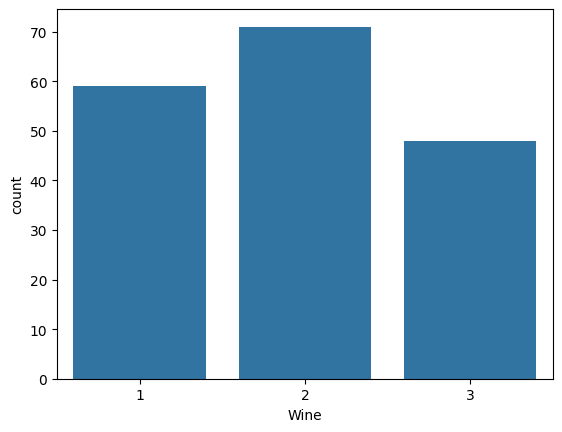

In [112]:
sns.countplot(x='Wine',data=df)

In [113]:
y=df['Wine']
x=df.drop('Wine',axis=1)

In [114]:
x.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=12)

In [117]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290
64,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355
47,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.10,0.91,3.33,985


In [118]:
from sklearn.preprocessing import StandardScaler

In [119]:
sc=StandardScaler()


In [120]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [121]:
X_train

array([[ 1.3795752 , -0.71372434, -0.13289403, ...,  0.87843914,
         0.25941852,  1.67692966],
       [ 1.69787314, -0.35270239,  0.08544833, ...,  1.01111189,
         0.52395286,  2.52197481],
       [-0.86075265,  0.53596703, -0.49679796, ...,  0.78999064,
         0.96484342, -1.45638381],
       ...,
       [-0.59142362, -0.9358917 , -0.38762678, ..., -0.97897934,
        -1.6658036 , -0.3169971 ],
       [ 0.21656348,  2.72061268, -0.13289403, ..., -1.64234308,
        -1.70989266, -0.07962486],
       [-1.63201305, -0.34344542, -1.58850975, ...,  1.14378464,
        -0.73993342, -1.0196189 ]])

In [122]:
#Converting Numpy Array into Dataframe 
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [123]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.379575,-0.713724,-0.132894,-0.802536,-0.300930,-0.179132,0.362434,-0.808128,-0.047397,0.022691,0.878439,0.259419,1.676930
1,1.697873,-0.352702,0.085448,-2.254798,0.191420,1.557239,1.561639,-0.561633,2.367767,1.117047,1.011112,0.523953,2.521975
2,-0.860753,0.535967,-0.496798,-0.439470,-0.793281,0.215498,0.184040,-0.890293,0.682365,-1.224875,0.789991,0.964843,-1.456384
3,-1.007659,-0.741495,0.631304,-0.136916,0.332092,-0.668473,-0.311500,0.753004,-0.985662,-0.874681,2.116718,-0.607666,-1.250661
4,1.110246,-0.528585,-0.860702,-1.044580,0.121084,1.241535,1.313869,-1.218952,0.942994,0.504207,-0.271391,1.008932,0.743266


In [124]:
#Retrieves 82nd row of Dataframe
X_train.iloc[81]

0     0.914371
1    -0.537842
2    -0.387627
3    -0.923558
4     1.316793
5     0.452276
6     0.828241
7    -1.218952
8     0.039479
9     0.394772
10   -0.227167
11    0.817880
12    0.980638
Name: 81, dtype: float64

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [127]:
from sklearn.metrics import classification_report

In [128]:
y_predict=model.predict(X_test)
y_actual=y_test

In [129]:
y_predict

array([3, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 3])

In [130]:
y_actual

160    3
156    3
78     2
45     1
112    2
168    3
7      1
153    3
103    2
150    3
137    3
161    3
124    2
83     2
149    3
23     1
1      1
5      1
21     1
152    3
Name: Wine, dtype: int64

In [131]:
print(classification_report(y_actual,y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       1.00      0.80      0.89         5
           3       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.97      0.93      0.95        20
weighted avg       0.96      0.95      0.95        20



<Axes: >

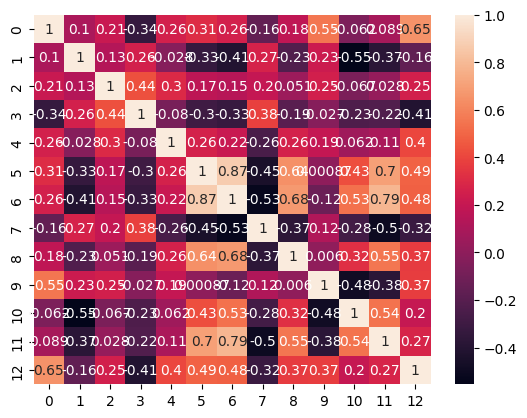

In [132]:
sns.heatmap(X_train.corr(),annot=True)

In [133]:
from sklearn.decomposition import PCA

In [134]:
#Taking 2 principal component pc1,pc2
pca=PCA(n_components=2)

In [135]:
tr_comp=pca.fit_transform(X_train)


ts_comp = pca.transform(X_test)


In [136]:
tr_comp

array([[ 1.65617834,  0.58558356],
       [ 4.296818  ,  1.98253   ],
       [ 0.56024994, -2.25594108],
       [-0.79314663, -1.82383755],
       [ 2.7552941 ,  0.57846581],
       [ 2.02098793,  0.6599833 ],
       [-1.64366121, -1.19487263],
       [-2.11913642, -1.33610777],
       [-0.17133388, -1.20520245],
       [ 2.55679449,  0.71466518],
       [ 2.42246525,  0.86579279],
       [ 1.88299014, -1.96543208],
       [ 3.02964162,  1.05787879],
       [-2.3295756 ,  2.83151093],
       [ 2.29181222,  1.59493059],
       [-3.38153826,  2.5841628 ],
       [ 0.87471779, -1.42241517],
       [ 2.39464565,  1.12779012],
       [-2.0239046 , -0.61177712],
       [-0.09549228, -1.17073168],
       [ 0.54430574,  0.26647938],
       [ 2.53509915,  1.74567006],
       [ 0.60597689, -2.02551267],
       [ 1.89167787,  1.58061362],
       [ 2.20369628,  2.24977698],
       [-3.62507651,  1.64241061],
       [-0.64818381, -2.16251538],
       [ 2.479931  ,  1.2432636 ],
       [-1.95844352,

In [137]:
tr_comp=pd.DataFrame(tr_comp)
ts_comp=pd.DataFrame(ts_comp)

In [138]:
tr_comp

,0,1
0,1.656178,0.585584
1,4.296818,1.982530
2,0.560250,-2.255941
3,-0.793147,-1.823838
4,2.755294,0.578466
...,...,...
153,3.799967,2.632207
154,-1.442131,0.291437
155,-2.532581,-0.174999
156,-3.628588,2.204653


In [139]:
pc_model=LogisticRegression()
pc_model.fit(tr_comp,y_train)

LogisticRegression()

In [140]:
y_predict=pc_model.predict(ts_comp)
y_predict

array([3, 3, 2, 1, 2, 3, 1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 1, 1, 1, 3])

In [141]:
y_actual=y_test

In [142]:
print(classification_report(y_actual,y_predict))

              precision    recall  f1-score   support

           1       1.00      0.83      0.91         6
           2       0.80      0.80      0.80         5
           3       0.90      1.00      0.95         9

    accuracy                           0.90        20
   macro avg       0.90      0.88      0.89        20
weighted avg       0.91      0.90      0.90        20



In [143]:
print(pca.explained_variance_ratio_)
print("Total variance captured:", sum(pca.explained_variance_ratio_))


[0.36071347 0.19310847]
Total variance captured: 0.5538219386766966


In [144]:
principal_comp=pca.components_

In [145]:
principal_comp

array([[ 0.16694031, -0.23166348,  0.0262404 , -0.2216462 ,  0.16197586,
         0.40080105,  0.42484935, -0.29729147,  0.33237846, -0.04623842,
         0.28334124,  0.36948555,  0.28892084],
       [ 0.46536198,  0.25231663,  0.30737909, -0.01343305,  0.27507806,
         0.04866612, -0.02814791,  0.05830167,  0.02884137,  0.53448122,
        -0.30250612, -0.18555036,  0.36116975]])

In [146]:
import matplotlib.pyplot as plt

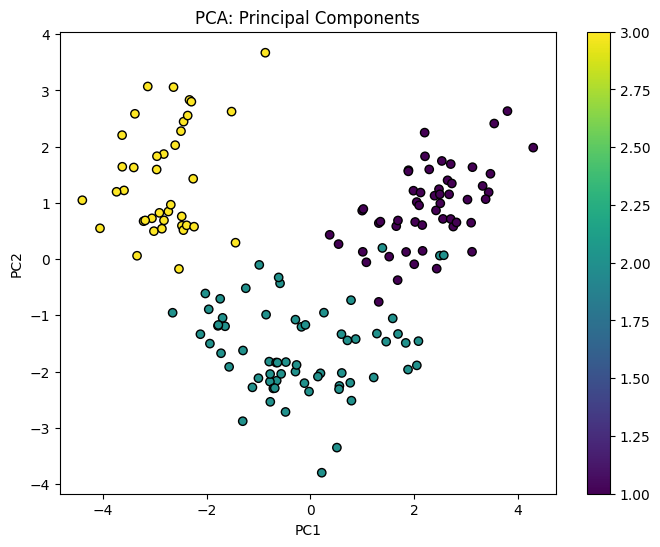

In [147]:
plt.figure(figsize=(8,6))
plt.scatter(tr_comp.values[:,0], tr_comp.values[:,1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: Principal Components")
plt.colorbar()
plt.show()
